In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.   **Import anything**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from time import time
import tensorflow as tf
from statistics import mode
import random

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
csv_final='/content/drive/MyDrive/TEAM_ML/ML/DataSet/data_file_csv_final.csv'

In [4]:
data = pd.read_csv(csv_final, encoding='utf-8')
data = data[['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2', 'endplus']]
train, test = train_test_split(data, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)
# feature Matrix, target vector 생성
target = 'endplus'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# 확인
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (1242, 6) (415, 6) (415, 6)
target vector:  (1242,) (415,) (415,)


2.   **Make Several models with gridsearch**

In [5]:
#임의로 각 모델을 정의하기
#아래로직을 통해 재정의를 함
tree_params = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    #'random_state' :[10, 20, 30, 42, 50, 100, 156]
}
t_grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    tree_params,
)
d_grid_result = t_grid_search.fit(X_train,y_train)
best_d_clf = t_grid_search.best_estimator_
best_d_clf.fit(X_train, y_train)
best_k_clf = KNeighborsClassifier()
best_r_clf = RandomForestClassifier()
best_ada_clf = AdaBoostClassifier(
    base_estimator=best_d_clf,
    n_estimators=10,
    learning_rate=0.1
)
best_gb_clf = GradientBoostingClassifier()

In [6]:
#### hyperparameter를 여러개로 바꿔서
#다시 KNeighborsClassifier 수행하기
k_params = {
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
k_grid_search = GridSearchCV(
    estimator=best_k_clf,
    param_grid=k_params,
    n_jobs=-1,
    verbose = 1
)

In [7]:
#### hyperparameter를 여러개로 바꿔서
#다시 RandomforestClassifier 수행하기
r_params = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    #'random_state' : [10, 20, 30, 42, 50, 100]
}
r_grid_search = GridSearchCV(
    estimator=best_r_clf,
    param_grid=r_params,
    n_jobs=-1,
)

In [8]:
#### hyperparameter를 여러개로 바꿔서
#다시 adaboost 수행하기
ada_params = {
    'n_estimators' : [10,20,50,100,150,200, 300],
    'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.5],
    #'random_state' :[10, 20, 30, 42, 50, 100]
}
ada_grid_search = GridSearchCV(
    estimator=best_ada_clf,
    param_grid=ada_params,
    n_jobs=-1,
    scoring='accuracy'
)

In [9]:
#### hyperparameter를 여러개로 바꿔서
#다시 gradientboost 수행하기
gb_params = {
    'n_estimators' : [10,20,50,100],
    'learning_rate' : [0.05, 0.1, 0.2, 0.3],
    #'random_state' :[10, 20, 30, 42, 50, 100]
}
gb_grid_search = GridSearchCV(
    estimator=best_gb_clf,
    param_grid=gb_params,
    n_jobs=-1,
    scoring='accuracy'
)

In [10]:
#kneighbor 다시 적용
k_grid_result = k_grid_search.fit(X_train,y_train)
print(k_grid_search.best_params_)
best_k_clf = k_grid_search.best_estimator_
best_k_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [11]:
#randomforest 다시 적용
r_grid_result = r_grid_search.fit(X_train,y_train)
print(r_grid_search.best_params_)
best_r_clf = r_grid_search.best_estimator_
best_r_clf.fit(X_train, y_train)

{'max_depth': 12, 'n_estimators': 340}


RandomForestClassifier(max_depth=12, n_estimators=340)

In [12]:
#adaboost 다시 적용
ada_grid_result = ada_grid_search.fit(X_train,y_train)
print(ada_grid_search.best_params_)
best_ada_clf = ada_grid_search.best_estimator_
best_ada_clf.fit(X_train, y_train)

{'learning_rate': 0.3, 'n_estimators': 100}


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5),
                   learning_rate=0.3, n_estimators=100)

In [13]:
#gradientboost 다시 적용
gb_grid_result = gb_grid_search.fit(X_train,y_train)
print(gb_grid_search.best_params_)
best_gb_clf = gb_grid_search.best_estimator_
best_gb_clf.fit(X_train, y_train)

{'learning_rate': 0.2, 'n_estimators': 50}


GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

In [14]:
vo_clf = VotingClassifier(estimators=[("RF", best_r_clf),
                                        ("AC", best_ada_clf),
                                        ("KN", best_k_clf),
                                        ("GN", best_gb_clf)], voting="soft")

3.   **Check Precision**

In [26]:
# 정확도
classifiers = [ best_r_clf, best_ada_clf, best_gb_clf, best_k_clf, vo_clf ]
pred_final = []
accuracy_store = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print("{}의 예측 정확도 : {}".format(name,
                                   round(accuracy_score(y_test, pred), 3)))
    pred_final.append(pred)
    accuracy_store.append(accuracy_score(y_test, pred))
print("Stacking 이전 일반모델들의 예측 정확도 평균 : {}"
      .format(round(np.mean(accuracy_store), 3)))
print("Stacking 이전 일반모델 중 예측 정확도 높은 모델 : {}"
      .format(round(np.max(accuracy_store), 3)))

RandomForestClassifier의 예측 정확도 : 0.559
AdaBoostClassifier의 예측 정확도 : 0.489
GradientBoostingClassifier의 예측 정확도 : 0.549
KNeighborsClassifier의 예측 정확도 : 0.47
VotingClassifier의 예측 정확도 : 0.588
Stacking 이전 일반모델들의 예측 정확도 평균 : 0.531
Stacking 이전 일반모델 중 예측 정확도 높은 모델 : 0.588


4.   **Show Conclusion**

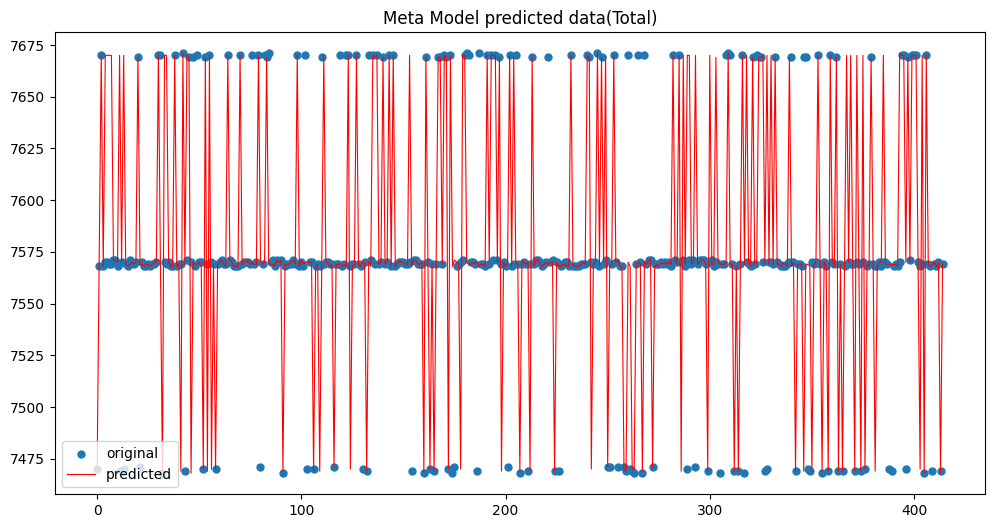

In [27]:
x_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (12,6)
plt.scatter(x_ax, y_test, label="original", alpha = 1, s = 5**2)
plt.plot(x_ax, pred_final[4], lw=0.8, color="red", label="predicted")
plt.title("Meta Model predicted data(Total)")
plt.legend()
plt.show()

# 예측모델 결과

In [28]:
Test_Predict = pd.DataFrame({
    'PassengerDestination' : y_test,
    'predict' : pred_final[4],
    'Success' : pred_final[4] == y_test
})
Test_Predict['Success'].value_counts()

True     244
False    171
Name: Success, dtype: int64

In [29]:
Test_Predict[:30]

,PassengerDestination,predict,Success
724,7470,7470,True
348,7568,7568,True
102,7670,7670,True
1080,7568,7568,True
1761,7570,7670,False
607,7570,7670,False
749,7569,7670,False
1082,7569,7670,False
1975,7571,7571,True
1760,7571,7571,True


              precision    recall  f1-score   support

        7468       0.50      0.18      0.27        11
        7469       0.46      0.52      0.49        25
        7470       0.43      0.38      0.40        16
        7471       1.00      0.27      0.43        11
        7568       0.62      0.64      0.63        59
        7569       0.62      0.68      0.65       103
        7570       0.51      0.50      0.50        76
        7571       0.62      0.52      0.56        31
        7669       0.83      0.77      0.80        26
        7670       0.55      0.69      0.61        51
        7671       0.75      0.50      0.60         6

    accuracy                           0.59       415
   macro avg       0.63      0.51      0.54       415
weighted avg       0.60      0.59      0.58       415



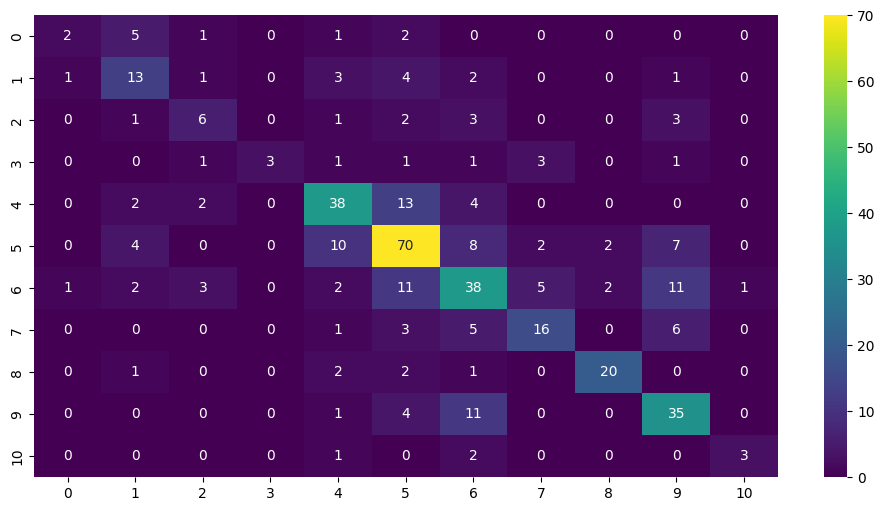

In [30]:
#분류 결과지표
cm = confusion_matrix(y_test,pred_final[4])
sns.heatmap(cm,annot=True,cmap='viridis')
print(classification_report(y_test, pred_final[4]))